# 🧹 Imputation Integrity Check

## 📌 Purpose

This notebook is dedicated to verifying the integrity and validity of the imputation process applied to the survey dataset. The objective is to:

- Confirm that all imputations were performed as intended.
- Identify any anomalies or unexpected values post-imputation.
- Summarize the strategies used for handling missing data.
- Document any adjustments or further cleaning necessary before analysis.

This step is crucial for ensuring that downstream analyses reflect accurate and reliable representations of the underlying data.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from music_and_mental_health_survey_analysis.config import (
    INTERIM_DATA_DIR,
    PROCESSED_DATA_DIR,
    FIGURES_DIR
)

2025-06-05 23:45:41.923 | INFO     | music_and_mental_health_survey_analysis.config:<module>:12 - PROJ_ROOT path is: /home/arsen/Documents/dsc_projects/music_health_survey/music_mental_health_analysis


# ✅ Verify Imputation Success

In [4]:
df = pd.read_csv(INTERIM_DATA_DIR / 'imputed.csv')
df.head()

,Age,Hours per day,BPM,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,156.0,Spotify,1.0,1.0,1.0,Latin,1.0,1.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,Improve
1,63.0,1.5,119.0,Pandora,1.0,0.0,0.0,Rock,1.0,0.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,Improve
2,18.0,4.0,132.0,Spotify,0.0,0.0,0.0,Video game music,0.0,1.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
3,61.0,2.5,84.0,YouTube Music,1.0,0.0,1.0,Jazz,1.0,1.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,18.0,4.0,107.0,Spotify,1.0,0.0,0.0,R&B,1.0,0.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve


In [5]:
df.isna().sum()

Age                             0
Hours per day                   0
BPM                             0
Primary streaming service       0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           720 non-null    float64
 1   Hours per day                 720 non-null    float64
 2   BPM                           720 non-null    float64
 3   Primary streaming service     720 non-null    object 
 4   While working                 720 non-null    float64
 5   Instrumentalist               720 non-null    float64
 6   Composer                      720 non-null    float64
 7   Fav genre                     720 non-null    object 
 8   Exploratory                   720 non-null    float64
 9   Foreign languages             720 non-null    float64
 10  Frequency [Classical]         720 non-null    object 
 11  Frequency [Country]           720 non-null    object 
 12  Frequency [EDM]               720 non-null    object 
 13  Frequ

In [7]:
df.describe()

,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Anxiety,Depression,Insomnia,OCD
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,24.988333,3.460486,123.229167,0.791667,0.320833,0.170833,0.713889,0.554167,5.831944,4.786111,3.719444,2.595833
std,11.607445,2.625094,29.578081,0.406399,0.467121,0.376625,0.452256,0.497403,2.783486,3.017119,3.068827,2.812496
min,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,140.000000,1.000000,1.000000,0.000000,1.000000,1.000000,8.000000,7.000000,6.000000,4.000000
max,80.000000,16.000000,210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000


## Continuous Features

In [8]:
# Load pre-imputation data

pre_imp_df = pd.read_csv(PROCESSED_DATA_DIR / 'processed_dataset.csv')

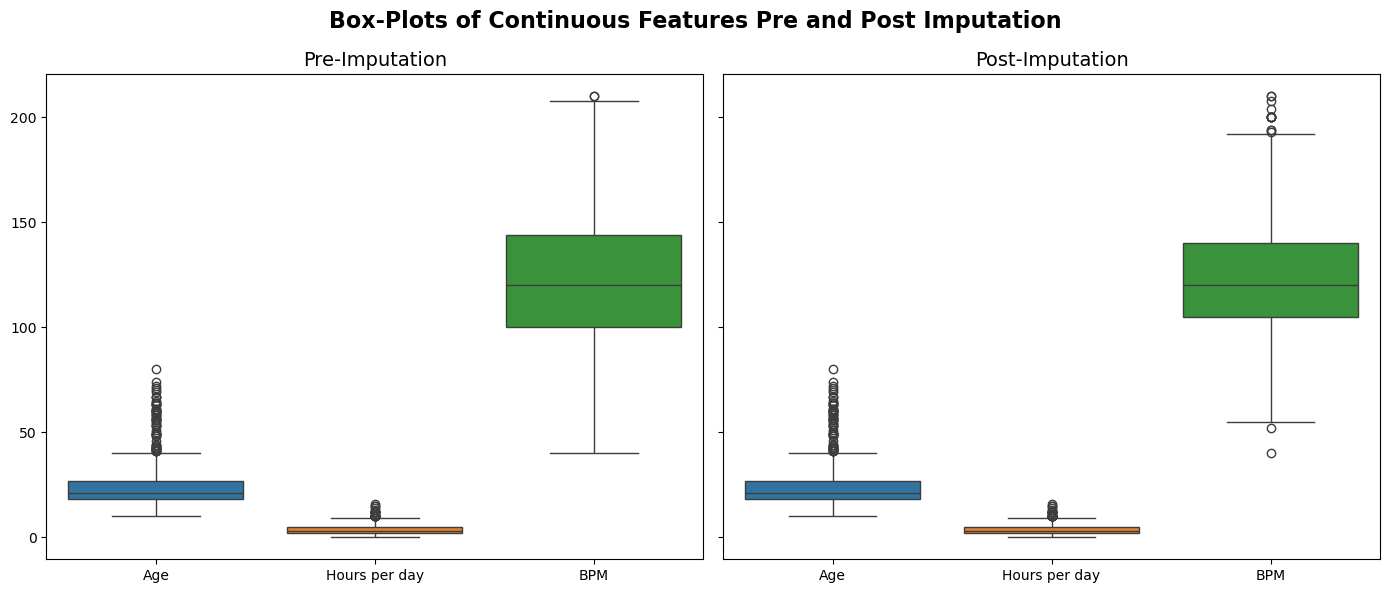

In [9]:
# Plot continuous feature boxplots pre and post imputation

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

continuous_features = ['Age', 'Hours per day', 'BPM']

fig.suptitle('Box-Plots of Continuous Features Pre and Post Imputation', fontsize=16, fontweight='bold')

sns.boxplot(df[continuous_features], ax=ax[1])
ax[1].set_title('Post-Imputation', fontsize=14)

sns.boxplot(pre_imp_df[continuous_features], ax=ax[0])
ax[0].set_title('Pre-Imputation', fontsize=14)

plt.tight_layout()
plt.show()

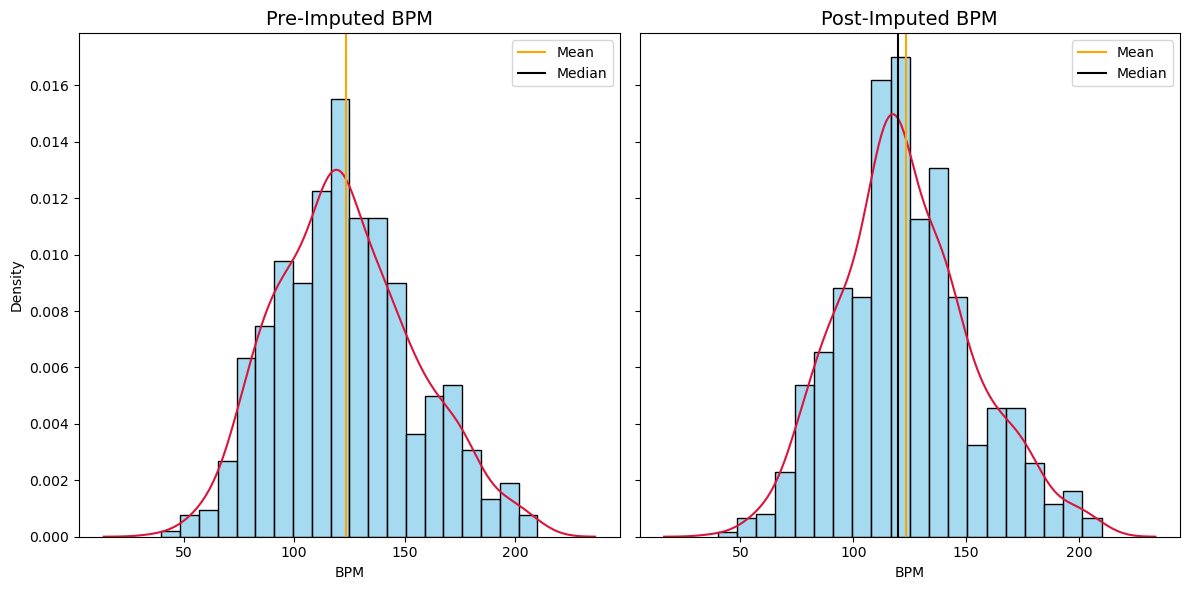

In [10]:
# Plot distributions of BPM pre and post imputation

pre_impute_bpm_mean = np.mean(pre_imp_df['BPM'])
pre_impute_bpm_median = np.median(pre_imp_df['BPM'])
post_impute_bpm_mean = np.mean(df['BPM'])
post_impute_bpm_median = np.median(df['BPM'])

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

ax[0].set_title('Pre-Imputed BPM', fontsize=14)
sns.histplot(pre_imp_df['BPM'], stat='density', ax=ax[0], color='skyblue', bins=20)
sns.kdeplot(pre_imp_df['BPM'], ax=ax[0], color='crimson')
ax[0].axvline(pre_impute_bpm_mean, color='orange', label='Mean')
ax[0].axvline(pre_impute_bpm_median, color='black', label='Median')
ax[0].legend()

ax[1].set_title('Post-Imputed BPM', fontsize=14)
sns.histplot(df['BPM'], stat='density', color='skyblue', bins=20)
sns.kdeplot(df['BPM'], color='crimson')
ax[1].axvline(post_impute_bpm_mean, color='orange', label='Mean')
ax[1].axvline(post_impute_bpm_median, color='black', label='Median')
ax[1].legend()

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'pre_post_impute_bpm.png', dpi=300, bbox_inches='tight')
plt.show()

### Summary

- The distribution of `BPM` pre and post imputation remains identical aside for a **higher central tendency**.
- According to the **mean** and **median** of both groups, **imputing by median** was favored over imputation by the mean.

## Ordinal Features

In [11]:
# Prepare pre and post impute data for plotting
freq_columns = df.columns[df.columns.str.startswith('Frequency')]

melted_df = df.melt(value_vars=freq_columns, value_name='Frequency', var_name='Genre')
melted_pre_imp_df = pre_imp_df.melt(value_vars=freq_columns, value_name='Frequency', var_name='Genre')
melted_df['Genre'] = melted_df['Genre'].str.replace('Frequency ', '').str.slice(1, -1)
melted_pre_imp_df['Genre'] = melted_pre_imp_df['Genre'].str.replace('Frequency ', '').str.slice(1, -1)

In [12]:
# Combine into one df

melted_df['Source'] = 'Post-Imputation'
melted_pre_imp_df['Source'] = 'Pre-Imputation'

combined_df = pd.concat([melted_df, melted_pre_imp_df])

<Figure size 1200x600 with 0 Axes>

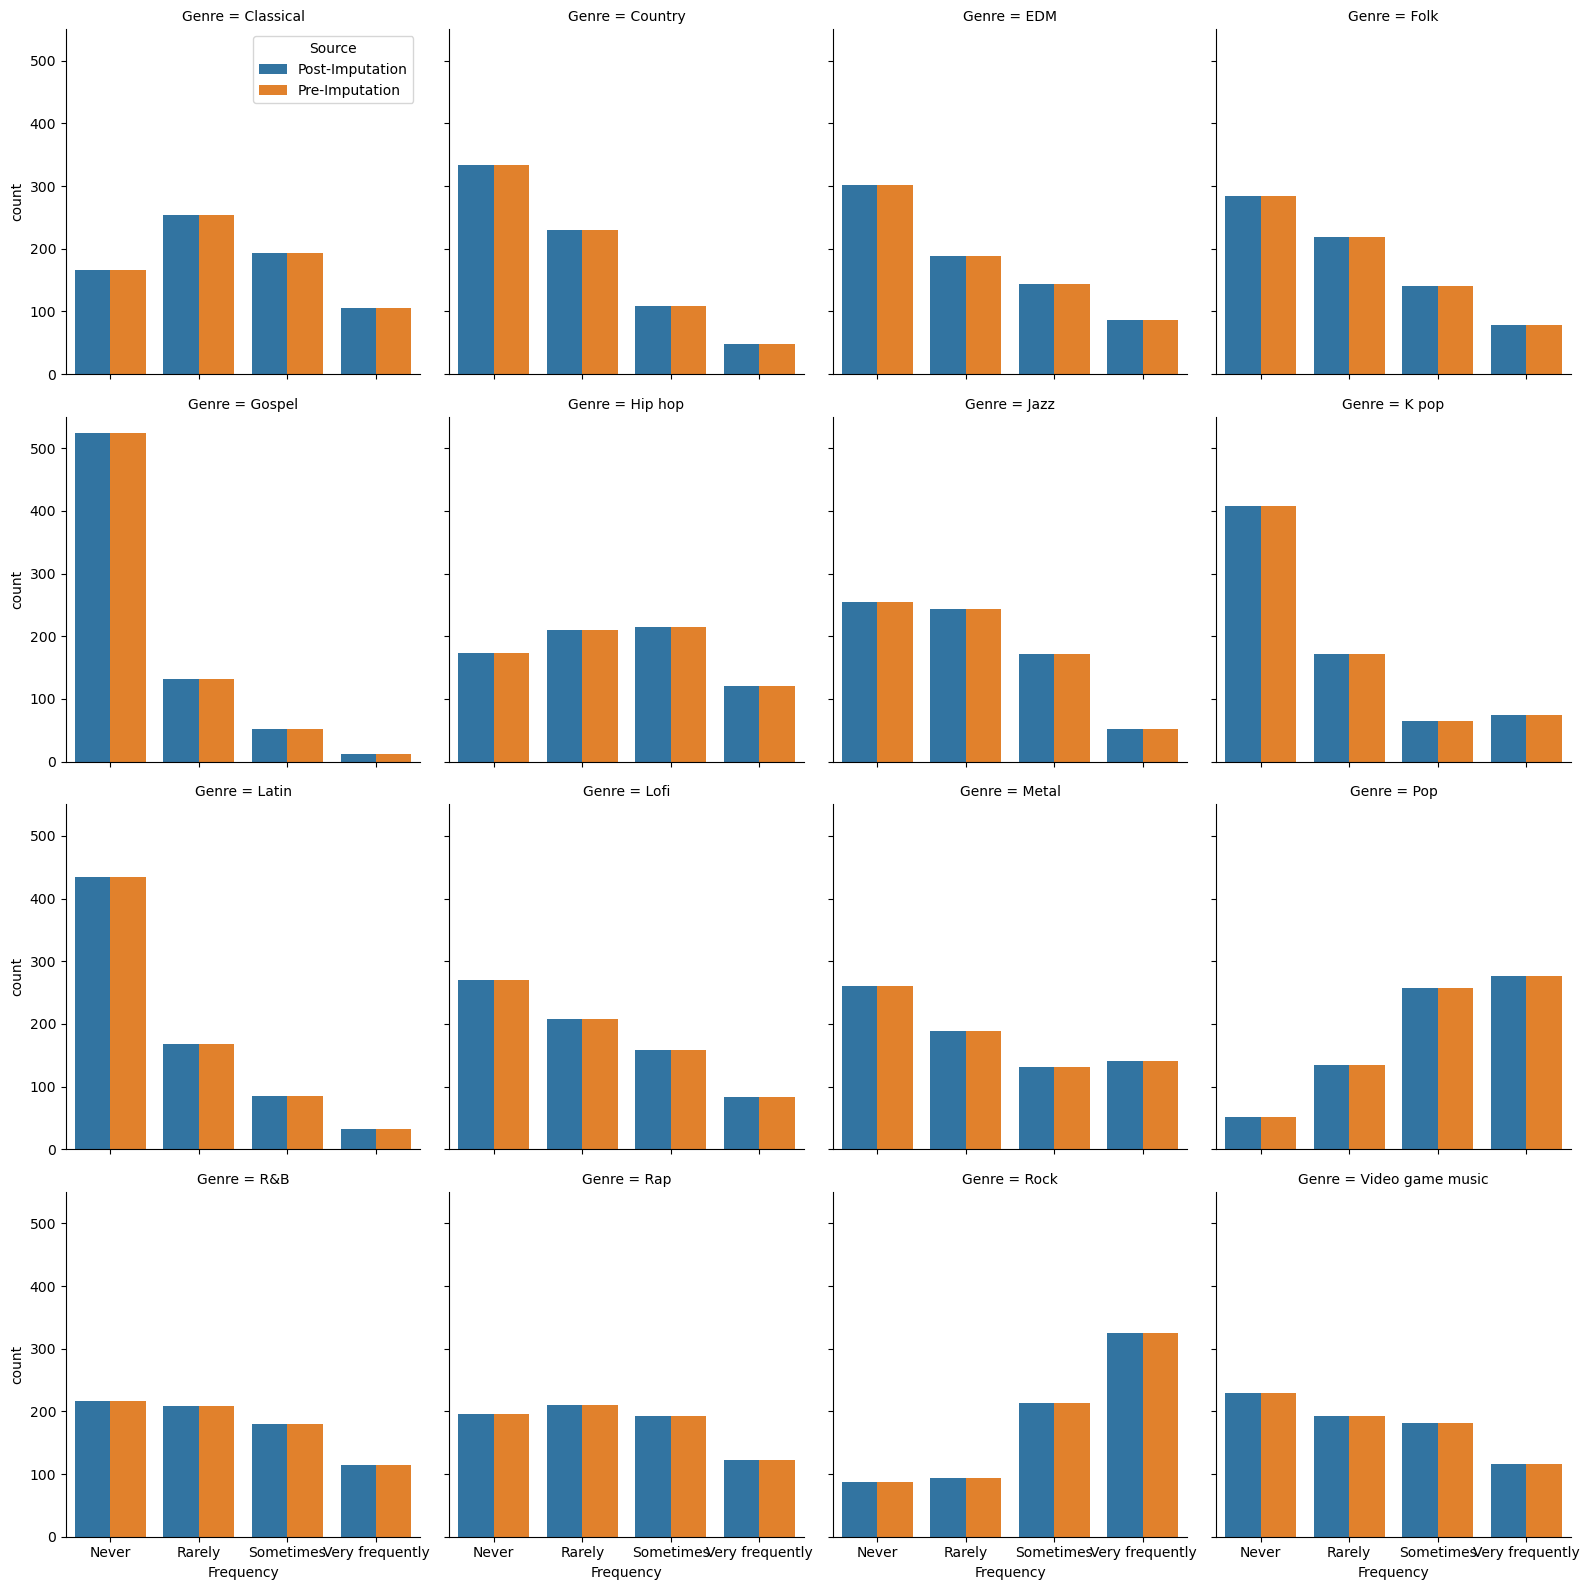

In [13]:
# Plot countplots from both datasets for comparison
plt.figure(figsize=(12, 6))

sns.catplot(
    data=combined_df,
    x='Frequency',
    kind='count',
    col='Genre',
    col_wrap=4,
    hue='Source',
    order=['Never', 'Rarely', 'Sometimes', 'Very frequently'],
    height=4,
    dodge=True,
    legend_out=False
)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'bar_pre_post_imputation.png', dpi=300, bbox_inches='tight')
plt.show()

Looks like there were **no changes** to `Frequency` columns post-imputation.

In [14]:
illness_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df[illness_cols].describe()

,Anxiety,Depression,Insomnia,OCD
count,720.000000,720.000000,720.000000,720.000000
mean,5.831944,4.786111,3.719444,2.595833
std,2.783486,3.017119,3.068827,2.812496
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000


In [15]:
pre_imp_df[illness_cols].describe()

,Anxiety,Depression,Insomnia,OCD
count,719.000000,718.000000,719.000000,718.000000
mean,5.830320,4.779944,3.724618,2.603064
std,2.785082,3.019054,3.067821,2.813068
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000


In [16]:
# Prepare pre and post impute data for plotting in long form

melted_df = df.melt(value_vars=illness_cols, var_name='Illness', value_name='Rank')
melted_df['Source'] = 'Post-Imputation'
melted_pre_imp_df = pre_imp_df.dropna().melt(value_vars=illness_cols, var_name='Illness', value_name='Rank')
melted_pre_imp_df['Source'] = 'Pre-Imputation'

combined_df = pd.concat([melted_pre_imp_df, melted_df])

In [17]:
# Since rank is ordinal not continuous convert to string

combined_df['Rank'] = combined_df['Rank'].astype(int).astype(str)
combined_df.dtypes

Illness    object
Rank       object
Source     object
dtype: object

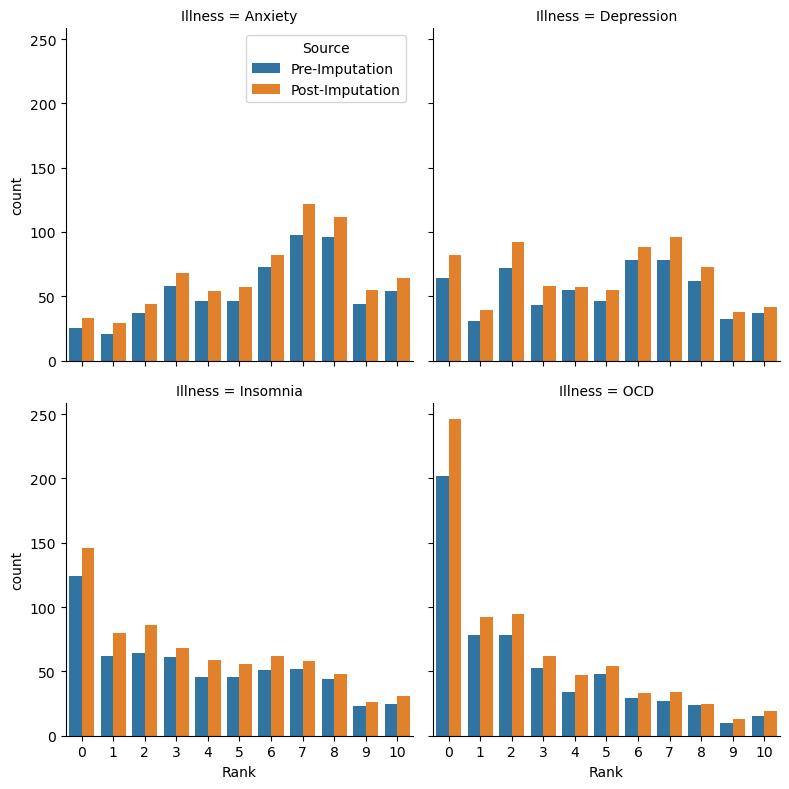

In [18]:
# Plot illness data pre and post imputation for comparison

sns.catplot(
    data=combined_df,
    x='Rank',
    col='Illness',
    col_wrap=2,
    kind='count',
    hue='Source',
    order=list(range(11)),
    height=4,
    legend_out=False,
)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'illness_pre_post_impute.png', dpi=300, bbox_inches='tight')
plt.show()

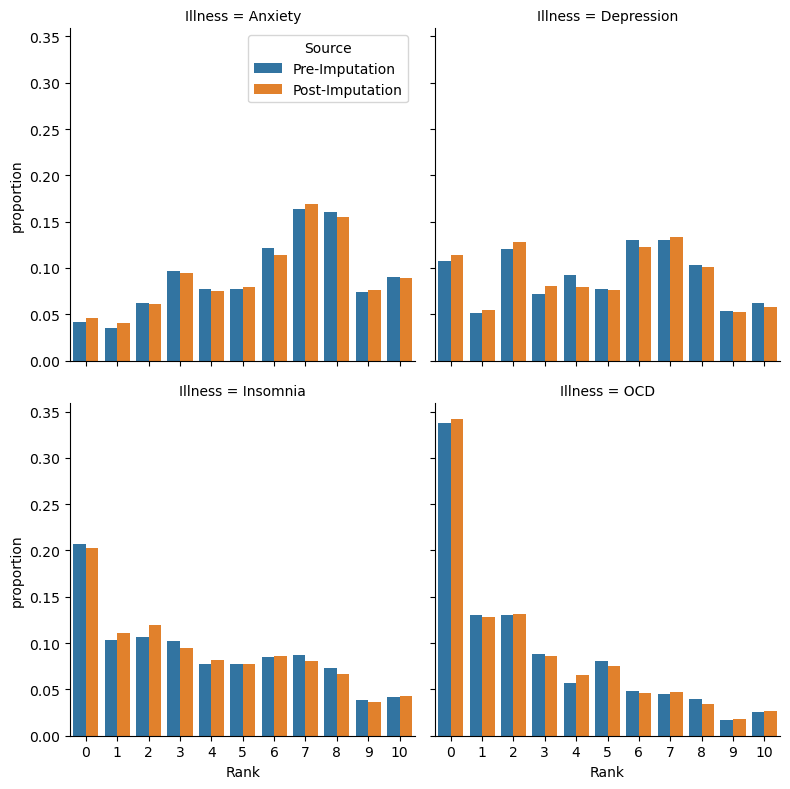

In [19]:
# Visualize percentages

grouped_combined = combined_df.groupby(by=['Illness', 'Source']).value_counts(normalize=True).reset_index()

sns.catplot(
    data=grouped_combined,
    x='Rank',
    y='proportion',
    col='Illness',
    col_wrap=2,
    kind='bar',
    hue='Source',
    hue_order=['Pre-Imputation', 'Post-Imputation'],
    order=list(range(11)),
    height=4,
    legend_out=False
)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'illness_pre_post_impute.png', dpi=300, bbox_inches='tight')
plt.show()

### Summary
- Ordinal feature distributions **were not** impacted by imputations.